In [35]:
import pandas as pd
import numpy as np
import sklearn as sk

In [36]:
#Visualiazation library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df= pd.read_csv("diamonds.csv")

In [4]:
df.describe()

,Unnamed: 0,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,0.798597,3.903980,4.126700,3939.103500
std,14433.901067,0.474651,1.117043,1.665564,3995.879832
min,1.000000,0.200000,1.000000,1.000000,326.000000
25%,12500.750000,0.400000,3.000000,3.000000,948.000000
50%,25000.500000,0.700000,4.000000,4.000000,2402.500000
75%,37500.250000,1.040000,5.000000,5.000000,5331.000000
max,50000.000000,5.010000,5.000000,8.000000,18823.000000


In [5]:
df.isnull().sum()

Unnamed: 0     0
carat          0
cut            0
cut_ord        0
color          0
clarity        0
clarity_ord    0
price          0
dtype: int64

In [6]:
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


<AxesSubplot:xlabel='carat', ylabel='price'>

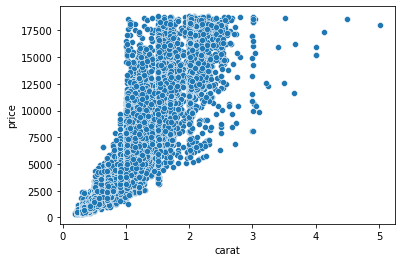

In [7]:
sns.scatterplot(x="carat", y="price", data= df)

In [8]:
#TO DROP ALL ALREADY ENCODED VALUE
target = df["price"]
x= df.drop(["price", "cut_ord","clarity_ord","Unnamed: 0"],axis=1)
x.head()

,carat,cut,color,clarity
0,0.51,Premium,F,VS1
1,2.25,Fair,G,I1
2,0.70,Very Good,E,VS2
3,0.47,Good,F,VS1
4,0.30,Ideal,G,VVS1


In [9]:
x= pd.get_dummies(x)
x.head()
#this method codes all the categorical variables

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.51,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2.25,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.70,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.47,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.30,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [10]:
#toscale the data
from sklearn.preprocessing import StandardScaler

In [11]:
#scaling helps reduce the value of our data so it can fit into the model.
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.6080254 , -0.17586311, -0.3162869 , ..., -0.54205944,
        -0.26921751, -0.32210675],
       [ 3.05785977,  5.6862407 , -0.3162869 , ..., -0.54205944,
        -0.26921751, -0.32210675],
       [-0.20772759, -0.17586311, -0.3162869 , ...,  1.84481613,
        -0.26921751, -0.32210675],
       ...,
       [ 0.71927785, -0.17586311, -0.3162869 , ...,  1.84481613,
        -0.26921751, -0.32210675],
       [ 0.44538988, -0.17586311, -0.3162869 , ...,  1.84481613,
        -0.26921751, -0.32210675],
       [ 2.0465811 , -0.17586311, -0.3162869 , ...,  1.84481613,
        -0.26921751, -0.32210675]])

In [12]:
#to split our data into test and train we import the library below
from sklearn.model_selection import train_test_split

In [13]:
#we split the data set here and into test and train where 30% is assigned to the test value
x_train, x_test, y_train, y_test= train_test_split(x,target,test_size=0.3,random_state=40)

In [14]:
#model fitting time, importing the libraries neccessary
from sklearn.linear_model import LinearRegression


In [15]:
model= LinearRegression()

In [16]:
#to fit the model ontop of our training dataet
model.fit(x_train,y_train)

LinearRegression()

In [17]:
#print the coefficient and intercept, where each coeffiecient represent each column
print(model.intercept_)
print(model.coef_)

3932.901652232143
[ 4.20617582e+03 -3.17203205e+15 -5.34644154e+15 -9.10779499e+15
 -8.11350405e+15 -7.74863203e+15 -1.79339472e+15 -2.08581154e+15
 -2.06649040e+15 -2.20197574e+15 -1.95532751e+15 -1.63573046e+15
 -1.20359909e+15  2.01261057e+15  3.10060342e+15  7.40948815e+15
  6.50597646e+15  6.21124767e+15  7.24857772e+15  4.34307634e+15
  5.04906085e+15]


In [18]:
#to compute the r squared score, r squared close to 1 is good
print(model.score(x_train,y_train))

0.9157289875119126


In [19]:
#To check our predicions
predictions = model.predict(x_test)

In [20]:
predictions

array([1594.90165223, 2420.90165223, 4807.40165223, ..., 6135.40165223,
       4660.90165223, 6708.40165223])

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [22]:
score=r2_score(predictions,y_test)
mae= mean_absolute_error(predictions,y_test)
mse= mean_squared_error(predictions,y_test)
rmse=np.sqrt(mse)

In [23]:
print(score)
print(mae)
print(mse)
print(rmse)

0.9084062729641323
797.9435811681549
1345133.7998314144
1159.7990342431806


In [24]:
#to predict the prices of a new and the real dataset of diamonds
df2= pd.read_csv('new-diamonds.csv')
df2

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6
...,...,...,...,...,...,...,...
2995,2996,0.72,Ideal,5,F,SI2,2
2996,2997,1.09,Premium,4,I,VS2,5
2997,2998,1.05,Very Good,3,G,SI1,3
2998,2999,0.70,Fair,1,G,SI1,3


In [25]:
k = df2.drop([ "cut_ord","clarity_ord","Unnamed: 0"],axis=1)
k.head()

,carat,cut,color,clarity
0,1.22,Premium,G,SI1
1,1.01,Good,G,VS2
2,0.71,Very Good,I,VS2
3,1.01,Ideal,D,SI2
4,0.27,Ideal,H,VVS2


In [26]:
k= pd.get_dummies(k)
k

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.22,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1.01,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.71,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1.01,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.27,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.72,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2996,1.09,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2997,1.05,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2998,0.70,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [27]:
model.fit(x,target)

LinearRegression()

In [28]:
predictions = model.predict(k)

In [29]:
predictions

array([ 9.02727881e+14,  8.95419083e+13, -1.59021730e+15, ...,
        7.59798255e+14, -1.03297206e+15,  1.32730216e+14])

In [30]:
k= df2.assign(predicted_prices = predictions)

In [31]:
k.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,predicted_prices
0,1,1.22,Premium,4,G,SI1,3,9.027279e+14
1,2,1.01,Good,2,G,VS2,5,8.954191e+13
2,3,0.71,Very Good,3,I,VS2,5,-1.590217e+15
3,4,1.01,Ideal,5,D,SI2,2,9.213968e+14
4,5,0.27,Ideal,5,H,VVS2,6,4.122230e+15


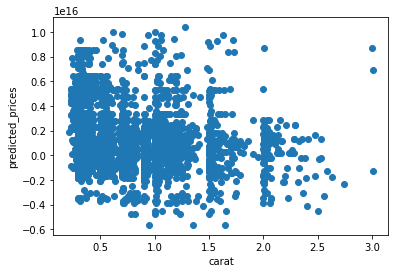

In [44]:
plt.scatter(x=k["carat"], y= k["predicted_prices"])
plt.ylabel("predicted_prices")
plt.xlabel("carat")
plt.show()


